7.4 차원 축소, 특성 추출, 매니폴드 학습

- 비지도 학습을 이용하여 데이터를 변환하는 이유는 시각화, 데이터 압축, 추가적인 처리를 위해 정보를 더 잘 드러내는 표현을 찾기 위함
- 이번 챕터에서는 주성분 분석(PCA), 특성 추출에 이용하는 비음수 행렬 분해(NMF), 2차원 산점도를 이용해 시각화용도로 많이 이용하는 t-SNE 학습

    1) 주성분 분석
    - 특성들을 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술 ( 회귀에서는 다중공선성이 문제가 된다 )
    - 회전한 뒤 데이터를 설명하는 데 중요도에 따라 새로운 특성준 일부만 선택

In [7]:
import mglearn

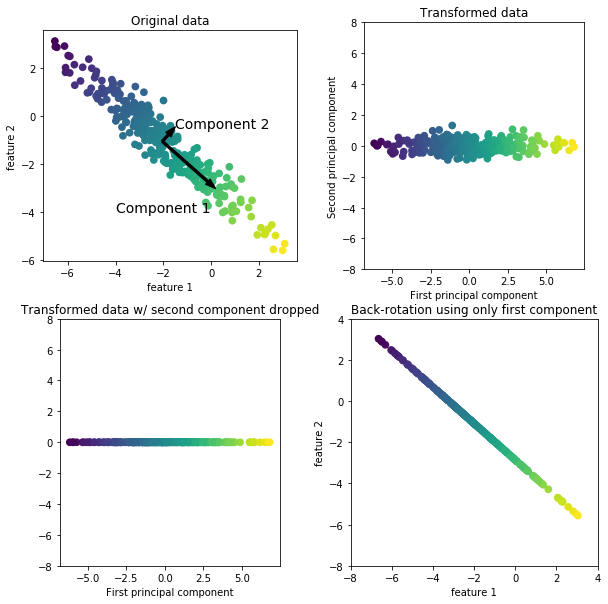

In [8]:
mglearn.plots.plot_pca_illustration()
# 1) 원본 데이터 
# 2) 변환된 데이터
# 3) 두번째 주성분을 제거한 변환된 데이터
# 4) 첫번째 주성분만 사용하여 회전 복원 


1) 원본 
    - component1이 가장 큰 방향을 갖는다(이 방향이 데이터에서 가장 많은 정보를 담고 있는 방향 - 특성들의 상관관게가 큰 방향 )
    
    - 탐색한 방향을 데이터에 있는 주된 분산의 방향이라고 해서 주성분이라고 한다
    
    - 일반적으로 원본 특성 개수만큼의 주성분이 있다

2) 변환 데이터 
    - 같은 데이터지만 주성분 1과 2를 각각 x, y축에 나란하도록 회전한 것 ( 회전하기 전 데이터에서 평균을 빼 중심을 원점에 맞춤 )
    
    - PCA에 의해 회전된 두축은 연관되지 않으므로 변환된 데이터의 상관관계 행렬이 대각선 방향을 제외하고는 0이된다. 
    
3) 두번째 주성분 제거 데이터 
    - 첫 번째 주성분만 남기는 등의 차원 축소 용도로 사용가능 ( 2차원에서 1차원으로 감소 )
    
    - 가장 유용한 방향을 찾아서 그 방향의 성분을 유지 하는 것( 위의 경우 오른쪽 아래로 향하는 성분이 해당 )

4) 주성분 제거 후 복원 데이터
    - 3)의 데이터에 평균을 더하고 반대로 회전 
    
    - 원래 특성 곤간에 위치하지만 첫번째 주성분의 정보만 포함 ( 노이즈 제거, 주성분에 유지되는 정보 시각화에 이용 )
  

*PCA가 널리 사용되는 분야는 고차원 데이터셋의 시각화이다. 

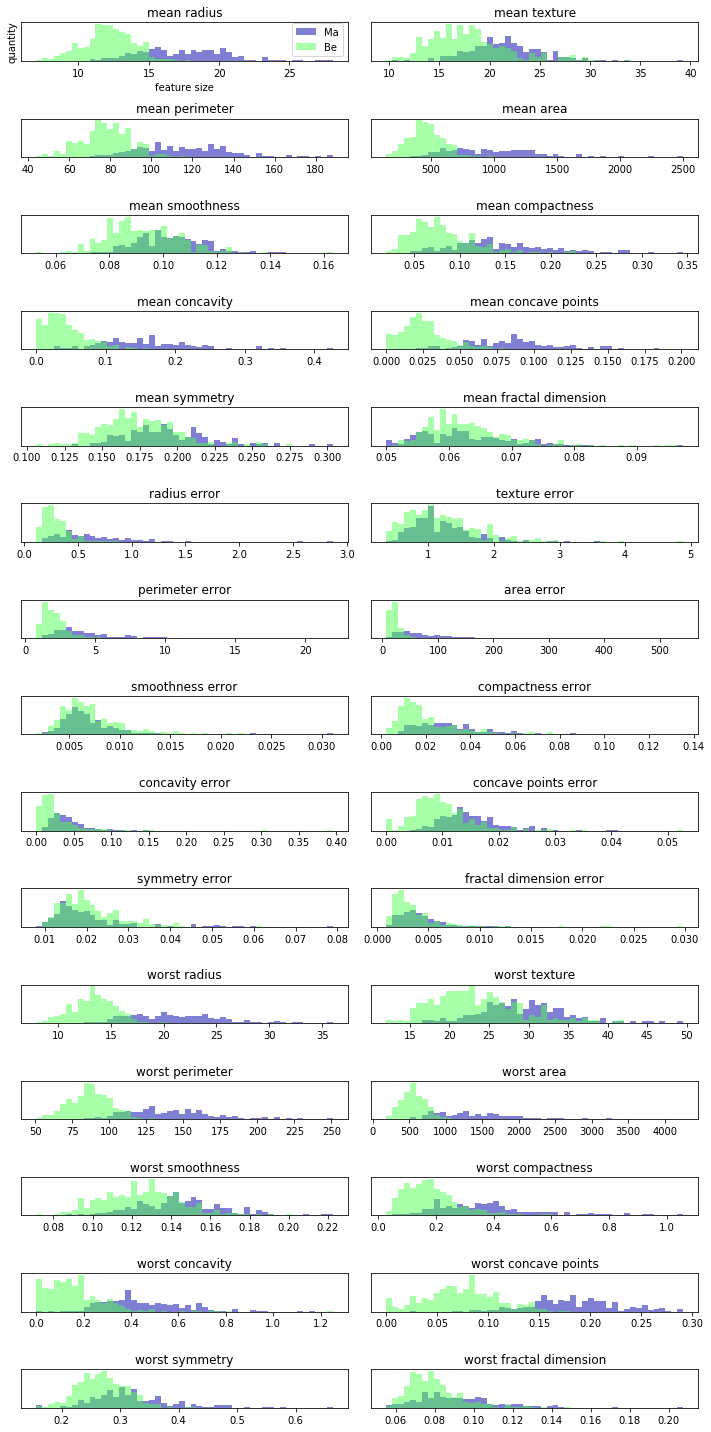

In [9]:
#유방암 데이터 셋을 이용해 양성과 악성 두 클래스에 대해 각 특성의 히스토그램을 그리는것 (30개의 특성)
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target ==0 ]
benign = cancer.data[cancer.target == 1] 

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins = 50)
    ax[i].hist(malignant[:,i], bins = bins , color = mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins = bins , color = mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel('feature size')
ax[0].set_ylabel('quantity')
ax[0].legend(['Ma','Be'],loc='best')
fig.tight_layout()

- 위 그림은 각 특성에 대한 히스토그램으로 특성 간격(bin)에 얼마나 많은 데이터 포인트가 나타나는지 횟수를 센 것.
- 각 그래프는 히스토그램 두 개를 겹처놓은 것으로 초록색은 양성, 푸른색은 악성의 포인트를 나타낸다.
- 이 그림은 특성들이 클래스별로 어떻게 분포되어있는지를 알려주고, 이를 통해 어떤 특성이 구분하는데 용이한지 파악 가능
- 그러나 특성간의 상호작용이나, 상호작용이 클래스와 어떤 관련이 있는지는 알 수없다.
- PCA를 이용하게 되면 주요 상호작용을 찾을 수 있다.

In [10]:
#PCA적용전 StandardScaler를 이용해 각 특성의 분산이 1이 되도록 데이터 스케일 조정
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [11]:
from sklearn.decomposition import PCA

#2개의 주성분만 유지
pca = PCA(n_components=2)

#유방암 데이터로 모델 생성
pca.fit(X_scaled)

#2개의 주성분으로 데이터 변환
X_pca = pca.transform(X_scaled)
print('원본 데이터 형태 :', str(X_scaled.shape))
print('축소 데이터 형태 :', str(X_pca.shape))

원본 데이터 형태 : (569, 30)
축소 데이터 형태 : (569, 2)


Text(0, 0.5, '2 PCA')

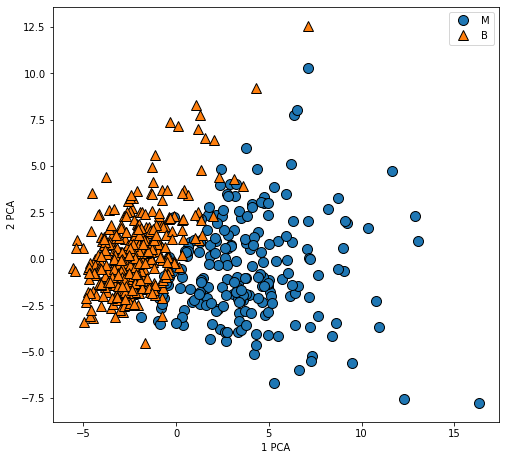

In [12]:
#처음 2개의 주성분을 그래프로 
plt.figure(figsize = (8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(['M','B'],loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('1 PCA')
plt.ylabel('2 PCA')

- PCA는 비지도 학습이므로 회전축을 찾을 때 어떤 클래스 정보도 사용하지 않는다. ( 단순히 데이터의 상관관계만 고려 )
- 클래스 정보를 이용하여 포인트의 모양을 구분하였다.
- PCA의 단점은 그래프의 두 축을 해석하기가 어렵다. 
- 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태이다. (조합이 매우 복잡 )
- PCA 객체 학습시 components_ 속성에 주성분이 저장된다.

In [13]:
print('PCA 주성분 형태 :', pca.components_.shape)

#각 행은 주성분 하나씩을 나타내며 열은 원본 데이터의 특성에 대흥하는 값 

PCA 주성분 형태 : (2, 30)


In [14]:
print("PCA 주성분 :", pca.components_)

PCA 주성분 : [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'PCA')

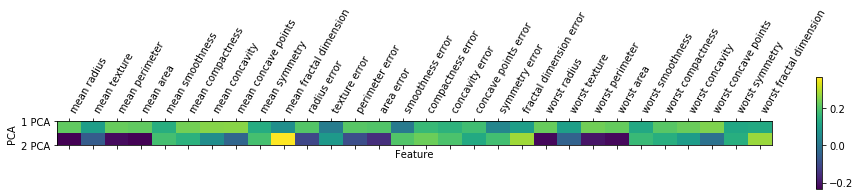

In [15]:
#주성분을 히트맵으로 시각화

plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ['1 PCA','2 PCA'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha = 'left')
plt.xlabel('Feature')
plt.ylabel('PCA')

- 첫 번째 주성분의 모든 특성은 부호가 같다 ( 모두 양수, 모든 특성 사이의 공통의 상호관계가 있다는 뜻이다. ) 
- 두 번째 주성분은 부호가 섞여 있어 축이 가지는 의미를 설명하기 쉽지 않다. 

고유 얼굴 특성 추출

- PCA는 특성 추출에도 이용된다. (원본데이터 표현보다 분석에 적합한 표현을 찾을 수 있단 생각에서 출발 )
- 이미지분석에는 특성 추출이 도움이 될만한 좋은 사례이다. ( 이미지는 수천, 수만개의 RGB의 강도가 기록된 픽셀로 이미지가 구성 )

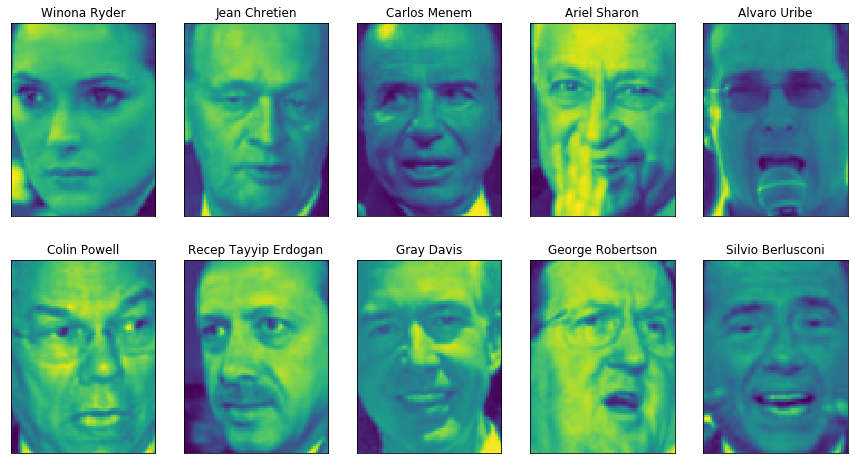

In [16]:
#PCA를 이용하여 얼굴 이미지에서 특성을 추출 하는 예제

from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2,5, figsize = (15, 8), subplot_kw={'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [17]:
print('image shape', people.images.shape)
print('클래스 개수 ', len(people.target_names))

image shape (3023, 87, 65)
클래스 개수  62


In [18]:
#데이터셋은 조지 부시와 콜린 파월의 이미지가 많아 편중을 없애기 위해 사람마다 50개의 이미지만 선택 

mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] =1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정(MinMaxScaler적용과 같다 )
X_people = X_people/255.

얼굴 인식은 통상적으로 새 이미지가 DB에 있는 기존 얼굴에 속하는지 찾는 작업이다.  ( 각 사람을 서로 다른 클래스로 구분하는 분류기를 만들어야한다 )

하지만 DB에 사람의 수는 많지만 사람에 대한 이미지는 적어 분류기 훈련이 어렵고 대규모 모델 훈련없이 새로운 얼굴 이미지를 추가 가능해야 한다. 

간단한 방법으로, 분류하려는 얼굴과 가장 비슷한 얼굴 이미지를 찾는 1 - 최근접 이웃 분류기 이용 가능하다. ( 원칙적으로 하나의 훈련 샘플 이용 )

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#데이터 스플릿
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)

#이웃 개수 1개로 모델 생성
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print('1-최근접이웃 테스트셋 점수 {:.2f}'.format(knn.score(X_test, y_test)))

1-최근접이웃 테스트셋 점수 0.23


4번에 한번 올바르게 인식하는 결과로 성능이 매우 좋지않다. 

*얼굴의 유사도를 측정하기 위해 원본 픽셀 공간에서 거리를 계산하는 것은 매우 나쁜 방법이다. 같은 위치, 다른 이미지의 픽셀의 

 회색 톤 값을 비교하는 것이 바람직하다. 
 
*이떄 PCA를 통해 기존의 거리 계산하여 얼굴 위치에 따른 차이를 반영하여 계산 하여 본다. 

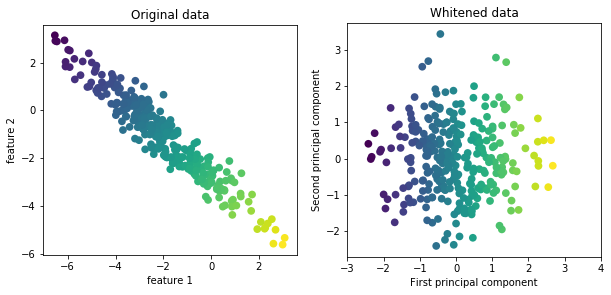

In [20]:
mglearn.plots.plot_pca_whitening()

PCA의 화이트닝 옵션( PCA변환 시 표준편차를 나누어 적용 = PCA 변환 후 , StandardScaler를 적용하는 것과 같다. )을 이용하여

데이터 회전 뿐 아니라 스케일도 조정 가능하다. 

In [21]:
#pca 객체를 훈련데이터로 학습 시켜 100개의 주성분 추출 및 데이터 변환

pca = PCA(n_components = 100, whiten = True, random_state = 0 ).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print('PCA 변환 후 Shape', X_train_pca.shape)

PCA 변환 후 Shape (1547, 100)


In [22]:
#다시 최근접 이웃 분류기 이용하여 분류 

knn.fit(X_train_pca, y_train)
print('1-최근접이웃 테스트셋 점수 {:.2f}'.format(knn.score(X_test_pca, y_test)))

#정확도 8% 향상되어  주성분이 데이터를 더 잘 표현한다 판단 가능
#이미지 데이터의 경우 계산한 주성분을 쉽게 시각화 가능

1-최근접이웃 테스트셋 점수 0.31


PCA components shape (100, 5655)


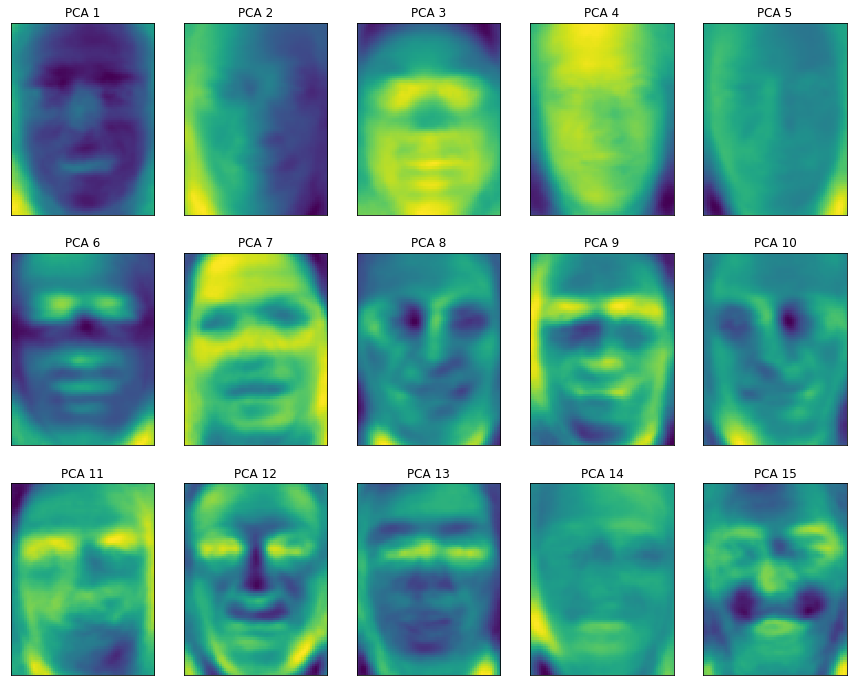

In [23]:
#PCA 시각화

print('PCA components shape',pca.components_.shape)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})

for i, (component, ax ) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap = 'viridis')
    ax.set_title('PCA {}'.format((i+1)))

- 주성분을 완벽하게 이해할 순 없지만, 이미지의 특징을 짐작해볼 수 있다.
- 사람이 얼굴을 인식하는 것과 알고리즘이 데이터를 해석하는 방식은 상당히 다르다. 
- 좋은 해석 방법은 테스트 포인트를 주성분의 가중치의 합으로 나타내는데 필요한 수치를 찾는 것으로 해석할 수 있다. 

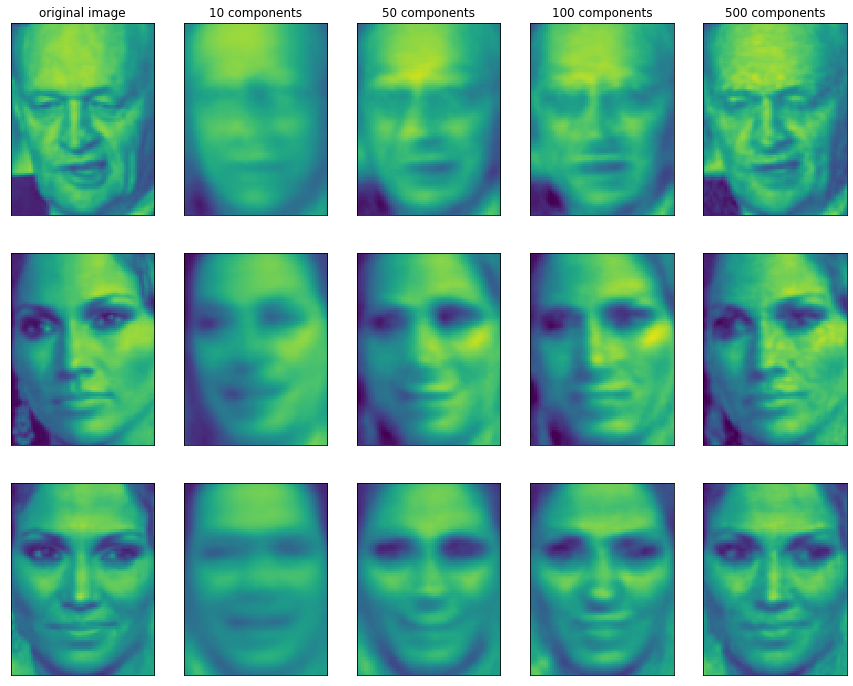

In [24]:
#주성분의 갯수에 따라 얼굴이미지를 재구성 한 것.
#주성분이 많아질 수록 원본이미지에 가까워 진다. 
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, '2 PCA')

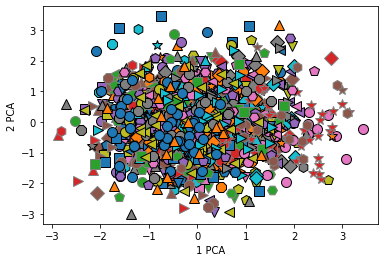

In [25]:
#위의 cancer 데이터처럼 pca의 처음 두 주성분을 이용해 전체 데에터를 누구의 얼굴인지 클래스로 구분해 산점도에 나타낼 수 있다.
#주성분 2개만 이용하는 경우 데이터가 뭉쳐있어 클래스 구분이 안되지만, 주성분이 많아질 수록 구분하기 뚜렷해진다. 
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.xlabel('1 PCA')
plt.ylabel('2 PCA')

비음수 행렬 분해(NMF)

- 유용한 특성을 뽑아내기위한 또 다른 비지도 학습 알고리즘 
- PCA와 비슷하고 차원 축소에도 이용 가능.
- 성분의 가중치 합으로 각 데이터 포인트를 표현 가능.
- PCA에서는 데이터 분산이 가장 크고 수직인 성분을 탐색했다면, NMF는 음수가 아닌 성분과 계수 값을 탐색한다.

  (즉 주성분과 계수 모두가 0보다 크거나 같아야 한다. - 따라서 음수가 아닌 특성을 가진 데이터에만 적용 가능 )
  
- 음수가 아닌 가중치 합으로 데이터를 분해하는 기능은 여러 음이 담긴 오디오 데이터에 유용하다. 
  
  (이때 원본 성분을 구분할 수 있다)

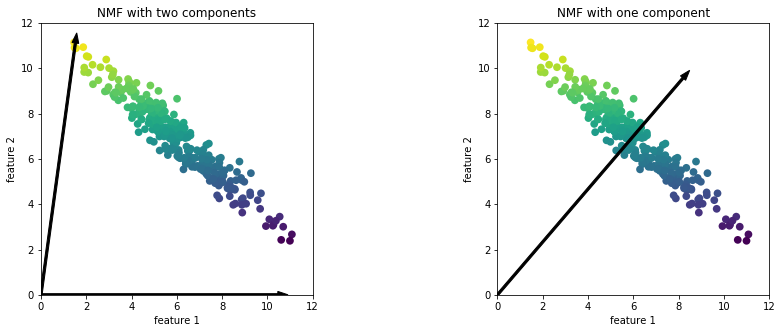

In [26]:
#인위적 데이터에 적용한 NMF

mglearn.plots.plot_nmf_illustration()

왼쪽은 성분이 둘인 NMF로 각 특성의 끝에 위치한 포인트를 가리키는 방향을 선택하고

오른쪽과 같이 하나의 성분만 이용하면 데이터를 가장 잘 표현가능한 평균으로 향하는 성분을 만든다.

PCA와는 반대로 성분 개수를 줄이면 특정 방향이 제거되는 것 뿐 아니라 전체 성분이 완전히 바뀐다. 
( 모든 성분을 동등하게 취급 )

무작위로 초기화하기 때문에 난수 생성 초깃값에 따라 결과가 달라진다. 

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.539869, ..., 0.243137],
       ...,
       [0.043137, ..., 0.593464]], dtype=float32), 
array([[0.237908, ..., 0.267974],
       ...,
       [0.401307, ..., 0.254902]], dtype=float32))
______________________________________________________nmf_faces - 474.0s, 7.9min


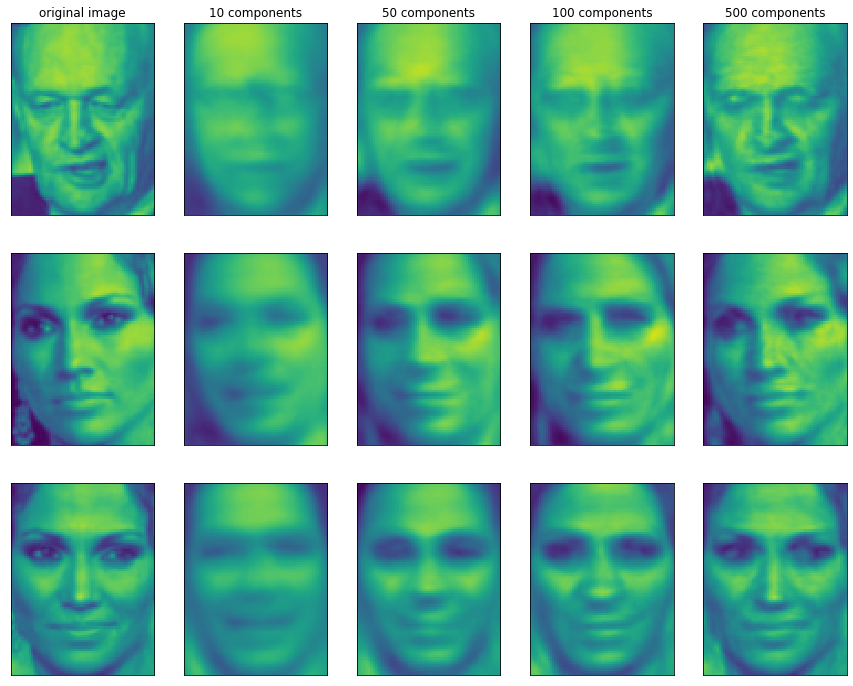

In [27]:
#얼굴 이미지에 NMF적용

mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

변환을 되돌린 결과는 PCA를 이용했을 때보다 조금 떨어지는 수준이다. 

(pca가 재구성 측면에서 최선의 방향을 찾기 때문 -> 따라서 NMF는 데이터를 인코딩, 재구성용도 보다는 주로 데이터에 있는 유용한 패턴 탐색에 활용)

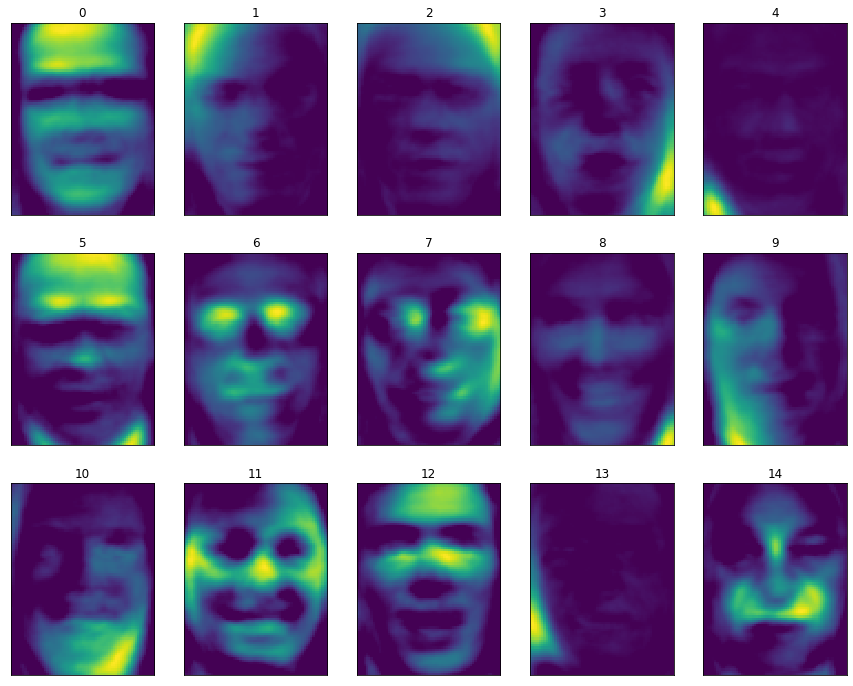

In [31]:
from sklearn.decomposition import NMF

nmf = NMF(n_components = 15, random_state = 0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3,5, figsize = (15, 12), subplot_kw={'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}".format(i))

- 위 성분들은 모두 양수값이어서 PCA보다 원형 처럼 보인다. 

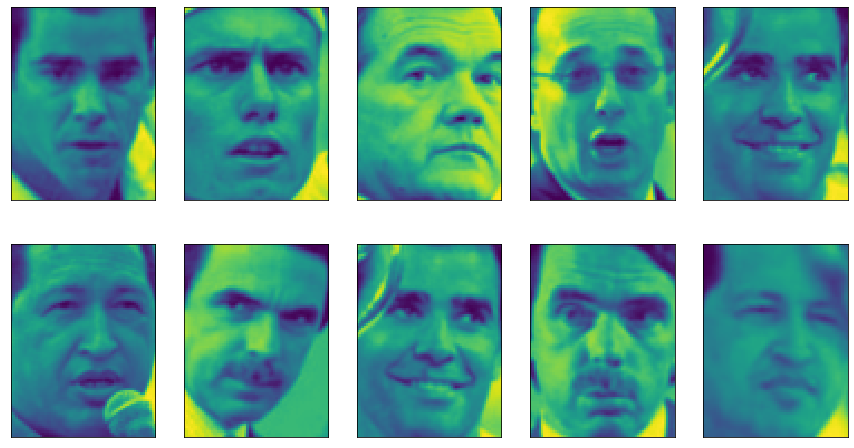

In [32]:
#위의 성분이 강하게 나타난 이미지들 확인

compn = 3

#4번째 성분으로 정렬하여 처음 10개 이미지를 출력

inds = np.argsort(X_train_nmf[:,compn])[::-1]
fig, axes = plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})

for i, (ind, ax ) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

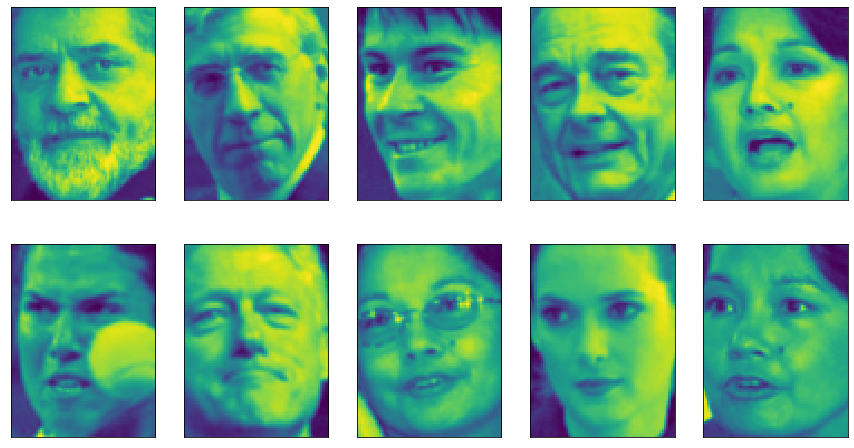

In [33]:
compn = 7

#8번째 성분으로 정렬하여 처음 10개 이미지를 출력

inds = np.argsort(X_train_nmf[:,compn])[::-1]
fig, axes = plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})

for i, (ind, ax ) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

- 8번째 성분에 대한 계수 값이 큰 얼굴들은 왼쪽으로 돌아가있고, 4번째 성분에 대한 계수 값이 큰 얼굴들은 오른쪽으로 돌아가있다.

- 이와 같은 패턴 추출은 소리, 유전자, 표현, 텍스트 데이터처럼 덧붙이는 구조를 가진 데이터에 적합하다. 

Text(0, 0.5, 'signal')

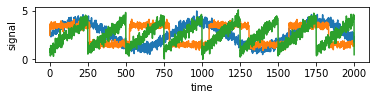

In [35]:
#세개의 서로 다른 입력으로부터 합성된 신호
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel("time")
plt.ylabel('signal')

원본 신호는 볼 수 없고 섞인 신호만 관찰 가능하다.

따라서 합쳐진 신호를 분해하여 원본 신호를 복원해야 한다
( 여러 방법 관찰 ,각 장치는 일련의 측정 데이터 제공이라 가정 )

In [36]:
#원본 데이터를 이용해 100개 측정 데이터 생성
A=np.random.RandomState(0).uniform(size=(100,3))
X=np.dot(S, A.T)
print('측정 데이터 형태', X.shape)

측정 데이터 형태 (2000, 100)


In [37]:
#NMF이용 세개 신호 복원
nmf = NMF(n_components = 3, random_state = 42)
S_=nmf.fit_transform(X)
print('NMF 복원 신호 형태', S_.shape)

NMF 복원 신호 형태 (2000, 3)


In [38]:
#PCA이용 
pca=PCA(n_components = 3)
H=pca.fit_transform(X)
print('PCA 복원 신호 형태 ', H.shape)

PCA 복원 신호 형태  (2000, 3)


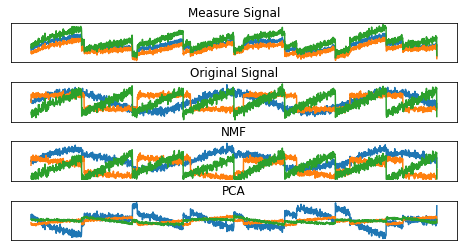

In [41]:
#시각화

models = [X, S, S_, H]
names = ['Measure Signal', 
        'Original Signal',
        'NMF',
        'PCA']

fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace':.5}, subplot_kw={'xticks':(), 'yticks':()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

- NMF가 PCA보다 원본 신호를 잘 복원 했다. 따라서 사용 목적에 따른 성분을 분해하는 알고리즘이 많이있지만

  이용 데이터 형태, 용도에 따라서 선택해야 할 것이다. 
 
- 패턴 추출에 관해 추가적으로 독립 성분 분석(ICA), 요인 분석(FA), 희소코딩(딕셔너리 학습) 등이 있다.

t-SNE를 이용한 매니폴드 학습

- 데이터를 산점도로 시각화 할 수 있는 이점으로 PCA가 종종 데이터 변환에서 가장 먼저 시도해볼 만한 방법이지만, 

  LFW 데이터셋 산점도에서 본 것처럼 알고리즘의 태생상 유용성이 떨어진다. 
  
- 매니폴드 학습 알고리즘이라 하는 시각화 알고리즘들은 훨씬 복잡한 매핑을 만들어 더나은 시각화를 제공한다

  ( 특히 t-SNE 알고리즘을 많이 사용한다. )
  
- 매니폴드 학습의 목적은 시각화라 3개 이상의 특성을 뽑는 경우는 거의 없다. 

  ( t-SNE 를 포함한 일부 매니 폴드 알고리즘들은 훈련 데이터를 새로운 표현으로 변환하지만, 새로운 데이터에 적용하지는 못한다. = 테스트 세트에 적용 X )
  
- 즉 매니폴드 학습은 탐색적 데이터 분석에 유용하지만, 지도학습용으로는 이용하지 않는다. 
- t-SNE의 아이디어는 데이터 포인트 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것이다. 

  원본 특성 공간에서 가까운 포인트는 더 가깝게(비중이 더 높다 ), 먼 포인트는 더 멀게 만든다.  = 이웃 데이터 포인트에 대한 정보 보존 노력
  
- scikit-learn의 t-SNE 구현은 쿨백-라이블러 발산 목적 함수를 최적화하기 위해 모멘텀을 적용한 배치 경사 하강법 이용

  ( 매개변수의 기본 값은 'barnes_hut'로 그레디언트 계산의 복잡도를 N^2 에서 NlogN으로 낮춰주는 방법이다. exact 옵션은 정확하지만 느리다 )

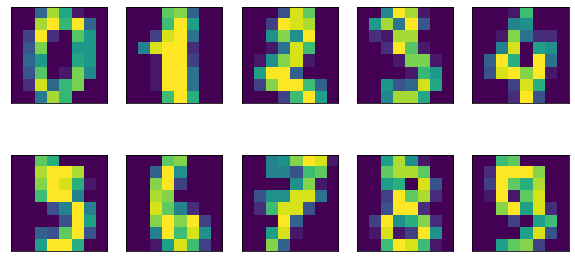

In [43]:
#손글시 숫자 데이터셋 예제 ( 8x8 흑백 이미지 )

from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10,5), subplot_kw={'xticks':(), 'yticks':()})

for ax, img in zip(axes.ravel(),digits.images):
    ax.imshow(img)

Text(0, 0.5, '2 PCA')

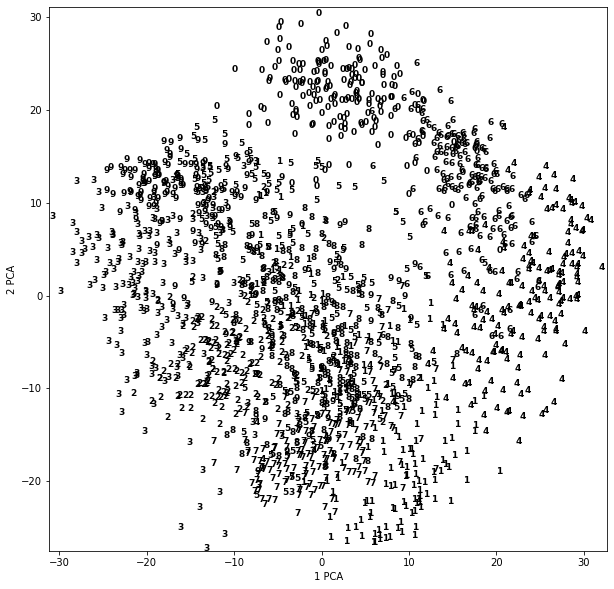

In [51]:
#pca를 이용하여 2차원으로 축소

pca = PCA(n_components = 2)
pca.fit(digits.data)

#두개의 주성분으로 숫자 데이터 변환

digits_pca = pca.transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max()+1)
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max()+1)

for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]), color = 'brewer_Spectral_11', fontdict={'weight':'bold','size':9})
    
plt.xlabel('1 PCA')
plt.ylabel('2 PCA')

- 0, 4, 6은 두개의 주성분 만으로 비교적 잘 분리되었지만, 아직 중첩된 부분이 있다. 

Text(0, 0.5, 't-sne 1')

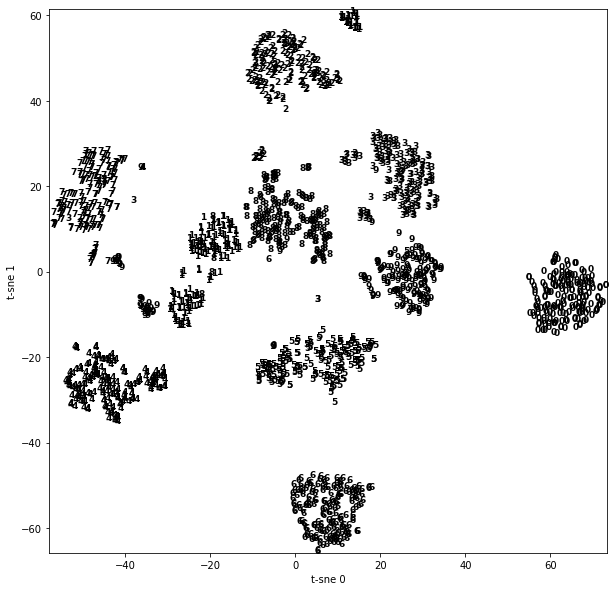

In [52]:
#같은 데이터셋이 t-SNE 적용 ( 새 데이터 변환 기능 제공 X, trnsform 메서드 대신 fit_transform 메서드 사용 )

from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)

digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i]),  color = 'brewer_Spectral_11',fontdict={'weight':'bold','size':9})
    
plt.xlabel('t-sne 0')
plt.ylabel('t-sne 1')

- 1과 9는 나뉘었지만 모든 클래스가 확실히 잘 구분되었다. 

- 클래스 레이블 정보를 이용하지 않는 완전한 비지도 학습이지만, 원본 데이터 공간에서 포인트들이 얼마나

  가까이 있는지에 대한 정보로 클래스가 잘 구분되는 2차원 표현을 찾는다. 
  
- t-SNE는 매개변수를 약간 조정해야 하지만 기본값으로도 잘 작동하는 경우가 많다.
  
  ( perplexity와 early_exaggeration을 변경할 수 있지만, 보통 효과는 크지 않다. )